In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/data/data/hgupta35/MuGEN/')
from MuGEN.analysis.dataset_bias import DatasetBias

In [2]:
orig_axg = pd.read_csv('/data/data/hgupta35/MuGEN/data/axg/original/otrain.csv')
synth_axg = pd.read_csv('/data/data/hgupta35/MuGEN/data/axg/synthetic/strain.csv')

orig_boolq = pd.read_csv('/data/data/hgupta35/MuGEN/data/boolq/original/otrain.csv')
synth_boolq = pd.read_csv('/data/data/hgupta35/MuGEN/data/boolq/synthetic/strain.csv')

orig_cb = pd.read_csv('/data/data/hgupta35/MuGEN/data/cb/original/otrain.csv')
synth_cb = pd.read_csv('/data/data/hgupta35/MuGEN/data/cb/synthetic/strain.csv')

orig_copa = pd.read_csv('/data/data/hgupta35/MuGEN/data/copa/original/otrain.csv')
synth_copa = pd.read_csv('/data/data/hgupta35/MuGEN/data/copa/synthetic/strain.csv')

orig_multirc = pd.read_csv('/data/data/hgupta35/MuGEN/data/multirc/original/otrain.csv')
synth_multirc = pd.read_csv('/data/data/hgupta35/MuGEN/data/multirc/synthetic/strain.csv')

orig_record = pd.read_csv('/data/data/hgupta35/MuGEN/data/record/original/otrain.csv')
synth_record = pd.read_csv('/data/data/hgupta35/MuGEN/data/record/synthetic/strain.csv')

orig_rte = pd.read_csv('/data/data/hgupta35/MuGEN/data/rte/original/otrain.csv')
synth_rte = pd.read_csv('/data/data/hgupta35/MuGEN/data/rte/synthetic/strain.csv')

orig_wic = pd.read_csv('/data/data/hgupta35/MuGEN/data/wic/original/otrain.csv')
synth_wic = pd.read_csv('/data/data/hgupta35/MuGEN/data/wic/synthetic/strain.csv')

orig_wsc = pd.read_csv('/data/data/hgupta35/MuGEN/data/wsc/original/otrain.csv')
synth_wsc = pd.read_csv('/data/data/hgupta35/MuGEN/data/wsc/synthetic/strain.csv')

In [50]:
dataset_corpus = {'AXG': (orig_axg, synth_axg), 'CB': (orig_cb, synth_cb), 
                  'COPA': (orig_copa, synth_copa), 'MultiRC': (orig_multirc, synth_multirc), 
                  'Record': (orig_record, synth_record), 'RTE': (orig_rte, synth_rte), 
                  'WIC': (orig_wic, synth_wic), 'WSC': (orig_wsc, synth_wsc), 
                  }

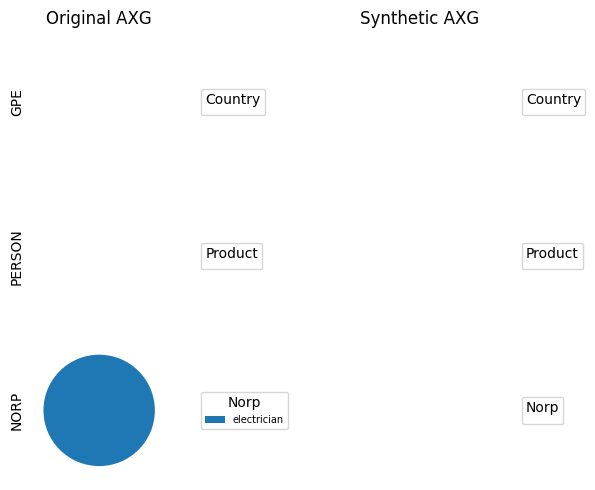

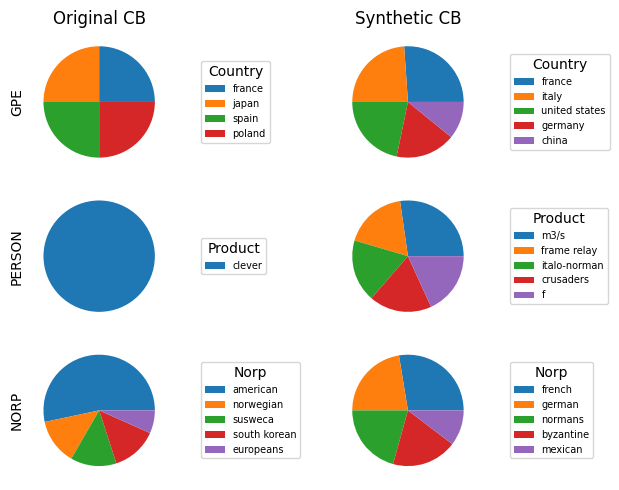

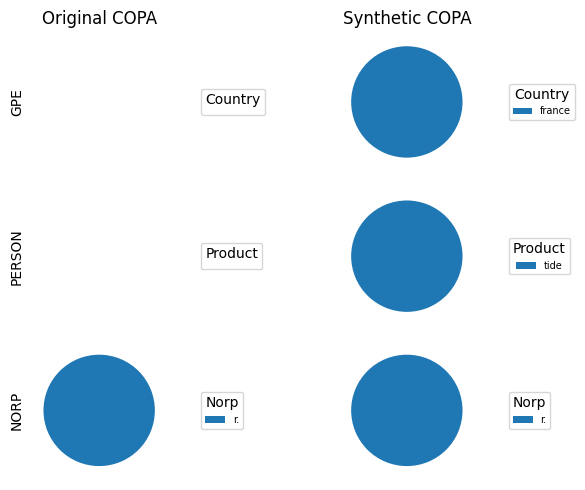

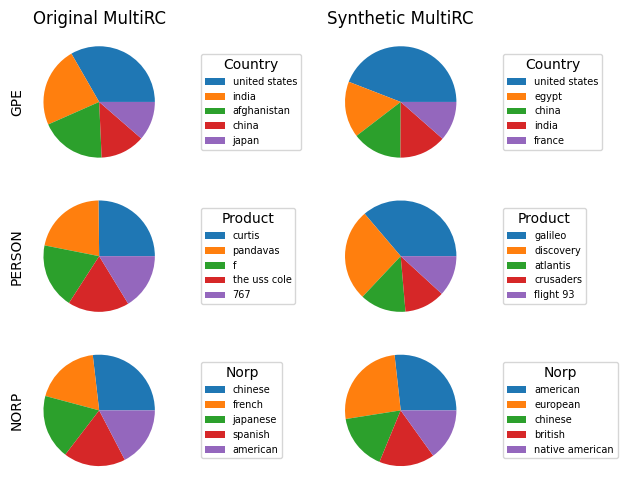

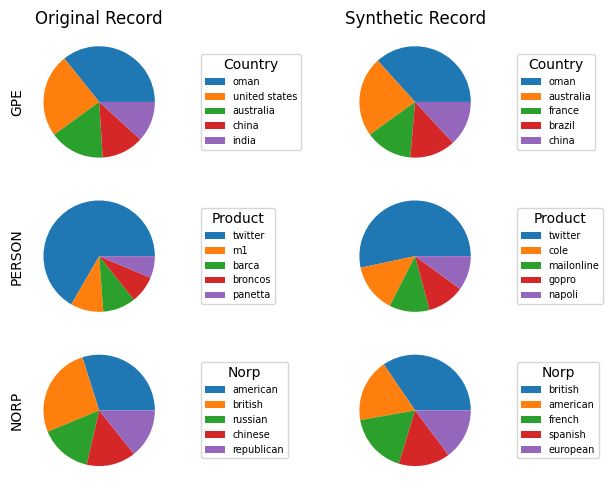

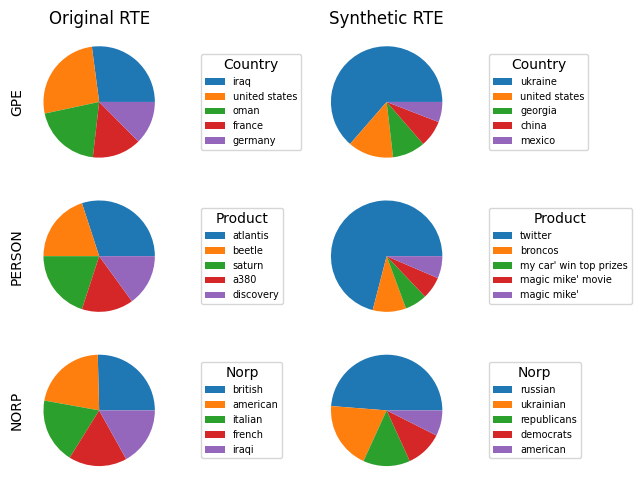

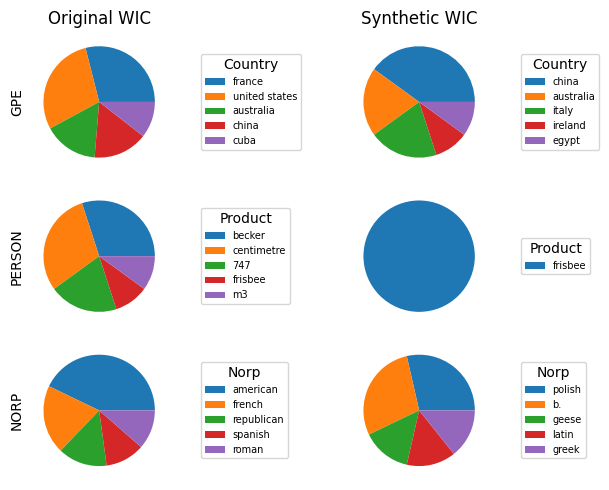

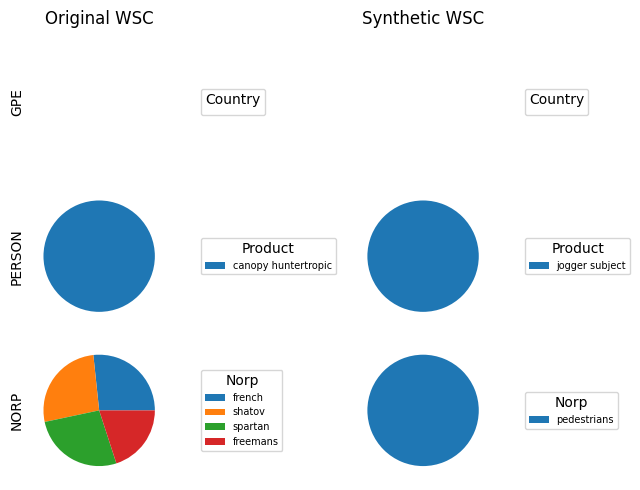

In [54]:
for name, df_corpus in dataset_corpus.items():
    orig_loc_dist = DatasetBias.get_location_distribution(df_corpus[0])
    synth_loc_dist = DatasetBias.get_location_distribution(df_corpus[1])

    orig_prod_dist = DatasetBias.get_product_distribution(df_corpus[0])
    synth_prod_dist = DatasetBias.get_product_distribution(df_corpus[1])

    orig_norp_dist = DatasetBias.get_norp_distribution(df_corpus[0])
    synth_norp_dist = DatasetBias.get_norp_distribution(df_corpus[1])

    fig, axs = plt.subplots(3, 2, figsize=(7, 5))
    fs = 7
    n = 5

    axs[0][0].set_title(f'Original {name}')
    axs[0][1].set_title(f'Synthetic {name}')

    axs[0][0].pie(orig_loc_dist.head(n)['Counts'], autopct='', textprops={'fontsize': fs})
    axs[0][0].legend(orig_loc_dist.head(n)['Country'], title='Country', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=fs)

    axs[0][1].pie(synth_loc_dist.head(n)['Counts'], autopct='', textprops={'fontsize': fs})
    axs[0][1].legend(synth_loc_dist.head(n)['Country'], title='Country', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=fs)

    axs[1][0].pie(orig_prod_dist.head(n)['Counts'], autopct='', textprops={'fontsize': fs})
    axs[1][0].legend(orig_prod_dist.head(n)['Product'], title='Product', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=fs)

    axs[1][1].pie(synth_prod_dist.head(n)['Counts'], autopct='', textprops={'fontsize': fs})
    axs[1][1].legend(synth_prod_dist.head(n)['Product'], title='Product', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=fs)

    axs[2][0].pie(orig_norp_dist.head(n)['Counts'], autopct='', textprops={'fontsize': fs})
    axs[2][0].legend(orig_norp_dist.head(n)['Norp'], title='Norp', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=fs)

    axs[2][1].pie(synth_norp_dist.head(n)['Counts'], autopct='', textprops={'fontsize': fs})
    axs[2][1].legend(synth_norp_dist.head(n)['Norp'], title='Norp', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=fs)

    axs[0][0].set_ylabel('GPE')
    axs[1][0].set_ylabel('PERSON')
    axs[2][0].set_ylabel('NORP')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.savefig(os.path.join('/data/data/hgupta35/MuGEN/analysis_files/dataset_bias', f"{name}_dataset_bias.png"), dpi=300, bbox_inches='tight')
    plt.show()